# Predicting Customer Churn

The main goal here is to build a model that can predict which customers might leave our service. If we know who is at risk, we can try to keep them.

In [224]:
# getting all the tools we need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Getting the data ready

First things we'll load the customer churn CSV file and take a quick peek at it.


In [225]:
# load the dataset and take a look
df = pd.read_csv('Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Cleaning up the data

Before we can do anything interesting, the data needs some cleaning. I'm removing the `customerID` column because it's not useful for prediction, converting the `TotalCharges` column into a number, and then just dropping any rows that have missing values to keep things simple.

In [226]:
# this column isn't useful for prediction, so let's drop it
df.drop('customerID', axis=1, inplace=True)

In [227]:
df.dropna(inplace=True)

In [228]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [230]:
# TotalCharges should be a number, not text this fixes it.
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [232]:
# just a quick clean-up of any rows with missing data
df.dropna(inplace=True)

## Preparing features for the model

The model only understands numbers, not text like 'Yes' or 'No'. So here, I'm splitting the data into the features (X) and the target we want to predict (y). Then, I'll convert all the text columns into a numerical format that the model can actually work with.

In [233]:
# separate data into features (X) and what we want to predict (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

In [234]:
X.nunique()

,0
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,72
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


In [235]:
# a quick loop to turn all the simple 'yes'/'no' style columns into 0s and 1s
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in X.columns:
    if X[column].nunique() == 2:
        X[column] = le.fit_transform(X[column])

y = le.fit_transform(y)

In [236]:
print(X)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL   

In [237]:
print(y)

[0 0 1 ... 0 1 0]


In [238]:
# this handles the categorical columns that have more than two options
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6,7,8,9,10,11,12,13,14,16])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [239]:
np.set_printoptions(suppress=True)
print(X)

[[   0.      1.      0.   ...    1.     29.85   29.85]
 [   1.      0.      0.   ...    0.     56.95 1889.5 ]
 [   1.      0.      0.   ...    1.     53.85  108.15]
 ...
 [   0.      1.      0.   ...    1.     29.6   346.45]
 [   0.      0.      1.   ...    1.     74.4   306.6 ]
 [   1.      0.      0.   ...    1.    105.65 6844.5 ]]


## Splitting and scaling the data

This is a standard step where we split data into a training set and a testing set. The model learns from the training data, and we check its performance on the unseen test data. I'm also scaling the features so that no single feature with large numbers unfairly influences the model.

In [240]:
# split data into a training set and a testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [241]:
# scale the data so everything has a similar range
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the logistic regression model

Time to train the model. I'm using Logistic Regression, which is a good, solid starting point. The most important part here is setting `class_weight='balanced'`. This tells the model to pay extra attention to the customers who actually churn, since there are fewer of them in the dataset. This really helps improve the result.

In [242]:
# create logistic regression model
# the 'balanced' part is key to making it perform well on imbalanced data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(class_weight='balanced')
classifier.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

## Making predictions

Now that the model is trained, let's use it to make some predictions on test data.

In [243]:
# use trained model to make predictions on the test set
y_pred = classifier.predict(X_test)

In [244]:
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(results)

      Actual  Predicted
0          0          1
1          0          0
2          0          0
3          1          1
4          1          1
...      ...        ...
1402       0          0
1403       1          0
1404       1          1
1405       0          0
1406       0          1

[1407 rows x 2 columns]


## Evaluating the model's performance

This is where we see how well model actually did. The confusion matrix gives us a visual breakdown of the correct and incorrect predictions. We're also looking at the main scores like accuracy, precision, and especially recall, which tells us how many of the actual churners we were able to find.

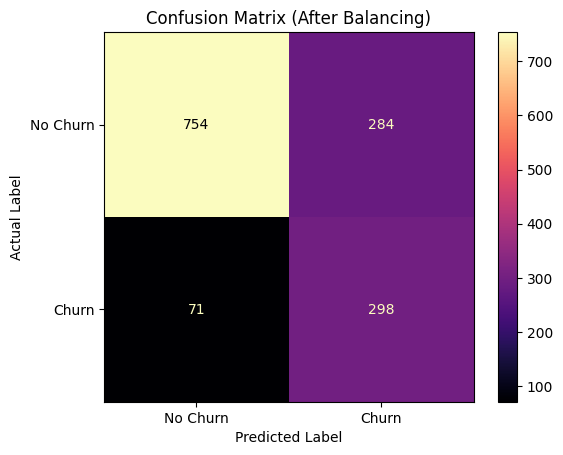

In [245]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# time to visualize the results with a confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='magma')
plt.title('Confusion Matrix (After Balancing)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')


plt.show()

In [246]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score

# print out the main performance scores
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred)}")

print(f"Precision Score: {precision_score(y_test, y_pred)}")

print(f"Recall Score: {recall_score(y_test, y_pred)}")

print(f"F1 Score: {f1_score(y_test, y_pred)}")

Overall Accuracy: 0.7476901208244492
Precision Score: 0.5120274914089347
Recall Score: 0.8075880758807588
F1 Score: 0.6267087276550999


In [247]:
from sklearn.metrics import classification_report
# full report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1038
           1       0.51      0.81      0.63       369

    accuracy                           0.75      1407
   macro avg       0.71      0.77      0.72      1407
weighted avg       0.81      0.75      0.76      1407

